<a href="https://colab.research.google.com/github/jgtolentino/MMM_KOL/blob/main/MMM_KOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     470.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.12e-61
Time:                        22:36:57   Log-Likelihood:                -361.49
No. Observations:                 100   AIC:                             733.0
Df Residuals:                      95   BIC:                             746.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9283      6.543  

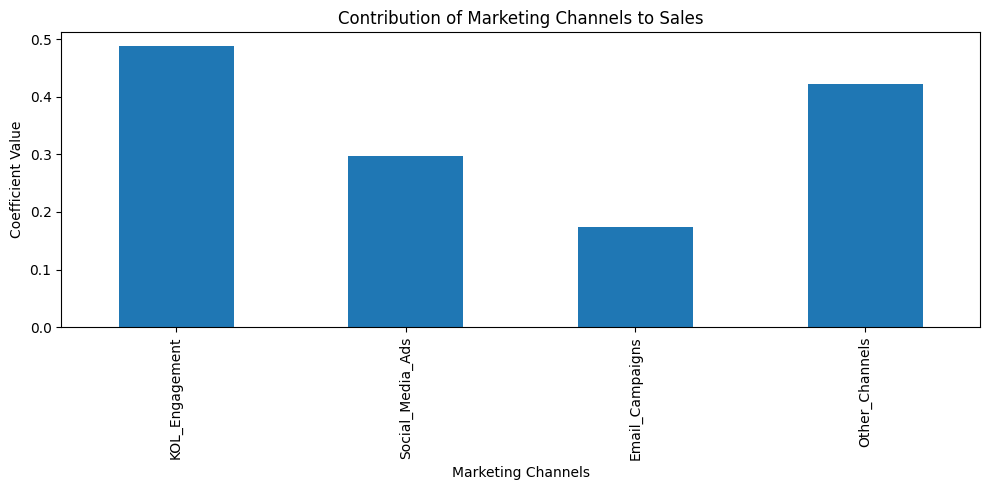

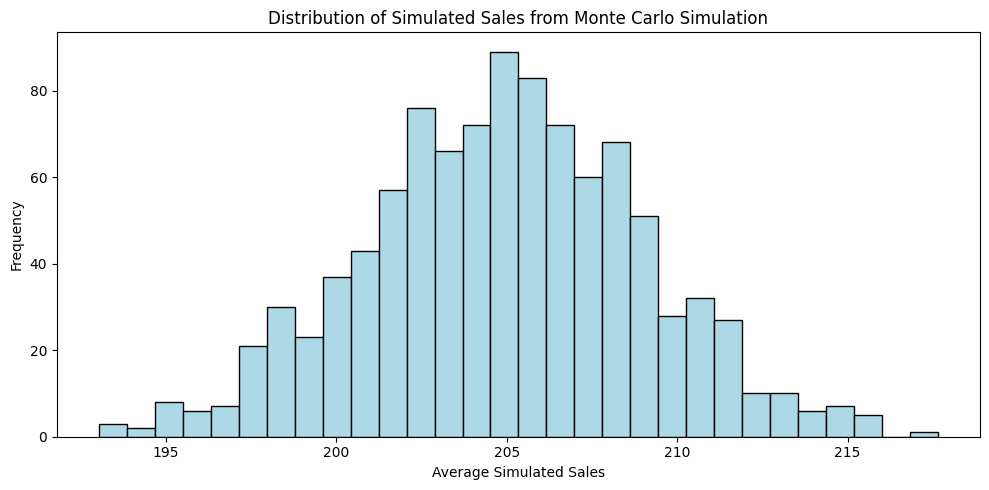

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Setting up HTML for explanations
display(HTML("""
<h1>Marketing Mix Modeling (MMM) with Simulated Data for KOL Performance</h1>
<p>This notebook demonstrates how to apply <strong>Marketing Mix Modeling (MMM)</strong> to evaluate the impact of different marketing channels, including Key Opinion Leader (KOL) performance, on sales. The process includes:</p>
<ul>
    <li>Data simulation to represent marketing activities.</li>
    <li>Building a multiple linear regression model to assess channel contributions.</li>
    <li>Calculating and displaying the percentage contribution of KOL Engagement to conversions.</li>
    <li>Visualizing contributions through a bar chart.</li>
    <li>Running a Monte Carlo simulation to predict sales outcomes.</li>
</ul>
"""))

# Generating simulated data
np.random.seed(42)
n = 100  # Number of observations

kol_engagement = np.random.uniform(50, 200, n)
social_media_ads = np.random.uniform(100, 500, n)
email_campaigns = np.random.uniform(20, 100, n)
other_channels = np.random.uniform(50, 150, n)

# Creating a dependent variable (sales) influenced by all channels with random noise
sales = (
    0.5 * kol_engagement +
    0.3 * social_media_ads +
    0.2 * email_campaigns +
    0.4 * other_channels +
    np.random.normal(0, 10, n)
)

# Creating a DataFrame
data = pd.DataFrame({
    'KOL_Engagement': kol_engagement,
    'Social_Media_Ads': social_media_ads,
    'Email_Campaigns': email_campaigns,
    'Other_Channels': other_channels,
    'Sales': sales
})

# Preparing the data for the regression model
X = data[['KOL_Engagement', 'Social_Media_Ads', 'Email_Campaigns', 'Other_Channels']]
X = sm.add_constant(X)  # Adding a constant for the intercept
y = data['Sales']

# Building the regression model
model = sm.OLS(y, X).fit()

# Displaying the model summary
display(HTML("<h2>Model Summary</h2>"))
print(model.summary())

# Calculating the contribution rate for KOL Engagement
total_conversion_rate = model.params['const'] + (
    model.params['KOL_Engagement'] * 100 +
    model.params['Social_Media_Ads'] * 150 +
    model.params['Email_Campaigns'] * 50 +
    model.params['Other_Channels'] * 75
)

kol_conversion_rate = model.params['KOL_Engagement'] * 100
kol_rate_percentage = (kol_conversion_rate / total_conversion_rate) * 100

# Displaying the percentage contribution of KOL Engagement
display(HTML(f"""
<h3>KOL Engagement Contribution Rate</h3>
<p><strong>KOL Engagement contributes approximately {kol_rate_percentage:.2f}%</strong> to the total estimated conversion rate, highlighting its significant role in driving conversions.</p>
"""))

# Visualizing the contribution of each channel to sales
coefficients = model.params[1:]  # Exclude the constant
coefficients.plot(kind='bar', title='Contribution of Marketing Channels to Sales', figsize=(10, 5))
plt.ylabel('Coefficient Value')
plt.xlabel('Marketing Channels')
plt.tight_layout()
plt.show()

# Monte Carlo Simulation for sales prediction
num_simulations = 1000
simulated_sales = []

for _ in range(num_simulations):
    simulated_kol = np.random.uniform(50, 200, n)
    simulated_social = np.random.uniform(100, 500, n)
    simulated_email = np.random.uniform(20, 100, n)
    simulated_other = np.random.uniform(50, 150, n)

    simulated_y = (
        coefficients['KOL_Engagement'] * simulated_kol +
        coefficients['Social_Media_Ads'] * simulated_social +
        coefficients['Email_Campaigns'] * simulated_email +
        coefficients['Other_Channels'] * simulated_other +
        model.params['const']
    )

    simulated_sales.append(np.mean(simulated_y))

# Plotting the distribution of simulated sales
plt.figure(figsize=(10, 5))
plt.hist(simulated_sales, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Simulated Sales from Monte Carlo Simulation')
plt.xlabel('Average Simulated Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Monte Carlo Discussion and Recommendations using HTML
display(HTML("""
<h3>Monte Carlo Simulation Discussion</h3>
<p>The Monte Carlo simulation shows the distribution of average sales across 1,000 simulated scenarios, providing insights into potential variability in sales outcomes. This helps in preparing for different market conditions and supports better strategic planning.</p>

<h3>Actionable Recommendations:</h3>
<ol>
    <li><strong>Prioritize High-Impact Channels:</strong> Focus on KOL engagement and social media ads for maximum return.</li>
    <li><strong>Use Predictive Insights:</strong> Leverage Monte Carlo results to plan for different outcomes and mitigate risks.</li>
    <li><strong>Enhance Email Campaigns:</strong> Further optimization can increase their impact.</li>
    <li><strong>Adopt a Dynamic Strategy:</strong> Integrate insights from this analysis with real-time data for continuous improvement.</li>
</ol>
"""))
